In [2]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import numpy as np
import csv
import warnings
import string
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# read dataset

df = pd.read_csv('C:\\Users\\krush\\Desktop\\DS Aditya\\financial_sentiment_data.csv', encoding='latin')
df.head(20)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


# EDA

In [4]:
df.shape

(5842, 2)

In [5]:
df[df['Sentence'].duplicated()]

,Sentence,Sentiment
266,Finnish GeoSentric 's net sales decreased to E...,neutral
283,Sales in Finland decreased by 10.5 % in Januar...,negative
349,Full-year operating result for 2008 was 3.6 mi...,negative
387,"Making matters more difficult , the company sa...",negative
496,"Antti Orkola , president of Kemira GrowHow 's ...",negative
...,...,...
5827,"( ADPnews ) - Oct 21 , 2009 - Finland-based IT...",negative
5831,Finnish developer and manufacturer of mobile p...,negative
5832,Operating profit fell to EUR 38.1 mn from EUR ...,negative
5837,RISING costs have forced packaging producer Hu...,negative


In [6]:
520/5842*100

8.90106128038343

- 8.9% approx 9% data is duplicated, which is less than 10% so we can drop them.

In [7]:
df.drop_duplicates('Sentence', inplace=True)

In [8]:
df.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5322 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5322 non-null   object
 1   Sentiment  5322 non-null   object
dtypes: object(2)
memory usage: 124.7+ KB


In [10]:
df.describe()

,Sentence,Sentiment
count,5322,5322
unique,5322,3
top,The GeoSolutions technology will leverage Bene...,neutral
freq,1,2878


# Data Cleaning


In [11]:
def clean_text(text):
    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # Remove links
    text = re.sub(r'http\S+', '', text)
    
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove non-english alphabets
    text = ''.join([i for i in text if i.isalpha() or i.isspace()])

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove stopwords and lemmatize the remaining words
    lemma= WordNetLemmatizer()

    tokens = [lemma.lemmatize(i) for i in tokens if not i in stopwords.words('english')]
    
    # Join the tokens back into a string
    text = ' '.join(tokens)

    return text


In [12]:
#Apply the functions
df['Sentence'] = df['Sentence'].apply(clean_text)

In [13]:
df.head()

,Sentence,Sentiment
0,geosolutions technology leverage benefon gps s...,positive
1,esi low bk real possibility,negative
2,last quarter componenta net sale doubled eurm ...,positive
3,according finnishrussian chamber commerce majo...,neutral
4,swedish buyout firm sold remaining percent sta...,neutral


# Visualization

In [14]:
df['Sentiment'].value_counts()

neutral     2878
positive    1852
negative     592
Name: Sentiment, dtype: int64

In [15]:
plt.rcParams['figure.figsize']= (12,6)
sns.set_style(style='darkgrid')


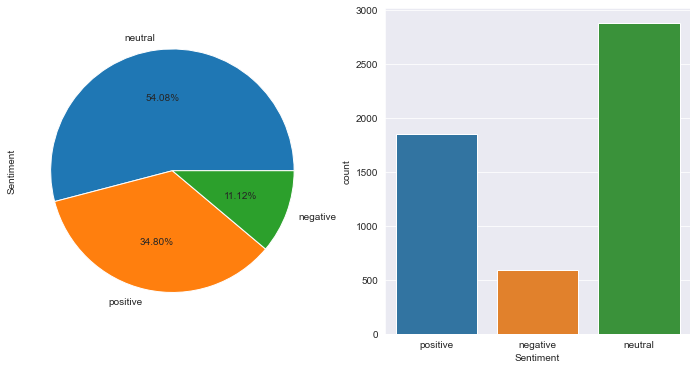

In [16]:
[plt.subplot(1,2,1),df['Sentiment'].value_counts().plot(kind='pie', autopct='%0.2f%%') ]
[plt.subplot(1,2,2),sns.countplot(data=df, x='Sentiment')]
plt.show()

In [17]:
# length

df['length']= df['Sentence'].apply(len)
df.head()

,Sentence,Sentiment,length
0,geosolutions technology leverage benefon gps s...,positive,182
1,esi low bk real possibility,negative,27
2,last quarter componenta net sale doubled eurm ...,positive,112
3,according finnishrussian chamber commerce majo...,neutral,93
4,swedish buyout firm sold remaining percent sta...,neutral,100


In [18]:
# number of words
df['num_words'] = df['Sentence'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head() 

,Sentence,Sentiment,length,num_words
0,geosolutions technology leverage benefon gps s...,positive,182,21
1,esi low bk real possibility,negative,27,5
2,last quarter componenta net sale doubled eurm ...,positive,112,18
3,according finnishrussian chamber commerce majo...,neutral,93,10
4,swedish buyout firm sold remaining percent sta...,neutral,100,14


In [19]:
df[['length','num_words']].describe()

,length,num_words
count,5322.000000,5322.000000
mean,79.677941,11.119692
std,42.225921,5.466832
min,0.000000,0.000000
25%,49.000000,7.000000
50%,69.000000,10.000000
75%,103.000000,14.000000
max,243.000000,38.000000


In [20]:
positive= df[df['Sentiment']=='positive']
negative= df[df['Sentiment']=='negative']
neutral= df[df['Sentiment']=='neutral']

In [21]:
df['label']= df['Sentiment'].map({'negative':0, 'neutral':1, 'positive':2})
df.head()

,Sentence,Sentiment,length,num_words,label
0,geosolutions technology leverage benefon gps s...,positive,182,21,2
1,esi low bk real possibility,negative,27,5,0
2,last quarter componenta net sale doubled eurm ...,positive,112,18,2
3,according finnishrussian chamber commerce majo...,neutral,93,10,1
4,swedish buyout firm sold remaining percent sta...,neutral,100,14,1


In [22]:
# positive reviews
df[df['label'] == 2][['length','num_words']].describe() 

,length,num_words
count,1852.000000,1852.000000
mean,76.870410,11.021058
std,41.363465,5.412941
min,6.000000,2.000000
25%,48.000000,7.000000
50%,66.000000,10.000000
75%,100.000000,14.000000
max,223.000000,32.000000


In [23]:
# negative reviews
df[df['label'] == 0][['length','num_words']].describe()

,length,num_words
count,592.000000,592.000000
mean,64.584459,9.881757
std,33.886188,4.702255
min,9.000000,2.000000
25%,42.000000,7.000000
50%,56.000000,9.000000
75%,79.000000,12.000000
max,192.000000,29.000000


In [24]:
# neutral reviews
df[df['label'] == 1][['length','num_words']].describe()

,length,num_words
count,2878.000000,2878.000000
mean,84.589298,11.437804
std,43.416153,5.608796
min,0.000000,0.000000
25%,51.250000,7.000000
50%,76.000000,10.000000
75%,112.000000,15.000000
max,243.000000,38.000000


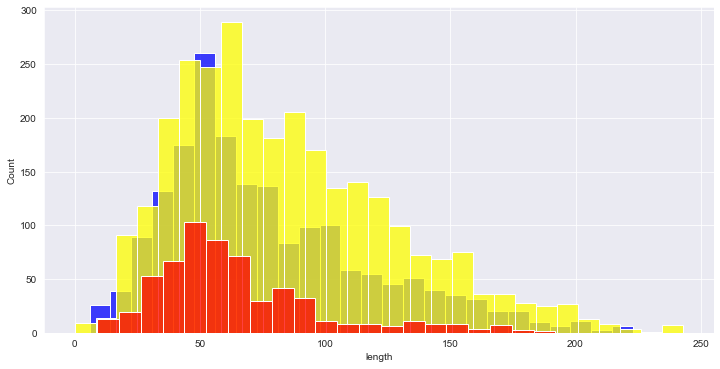

In [25]:
sns.histplot(df[df['label'] == 2]['length'],color='blue')
sns.histplot(df[df['label'] == 1]['length'],color='yellow')
sns.histplot(df[df['label'] == 0]['length'],color='red')
plt.show()

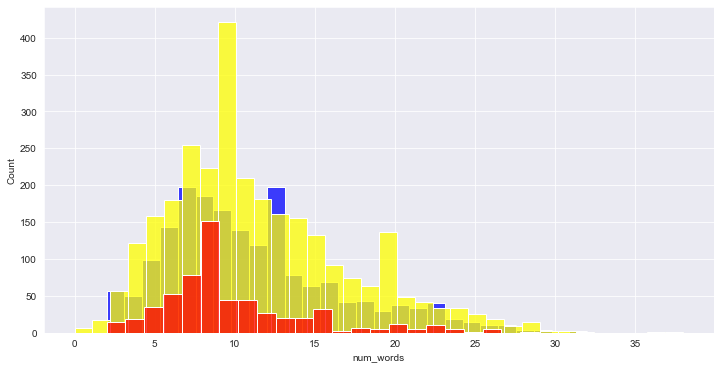

In [26]:
sns.histplot(df[df['label'] == 2]['num_words'],color='blue')
sns.histplot(df[df['label'] == 1]['num_words'],color='yellow')
sns.histplot(df[df['label'] == 0]['num_words'],color='red')
plt.show()


# Polarity

In [27]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [28]:
sent_int= SentimentIntensityAnalyzer()

df['Polarity_vader']= df['Sentence'].map(lambda txt: sent_int.polarity_scores(txt))

In [29]:
from textblob import TextBlob

df["Polarity"] = df["Sentence"].map(lambda txt: TextBlob(txt).sentiment.polarity)

Text(0.5, 1.0, 'Polarity Score')

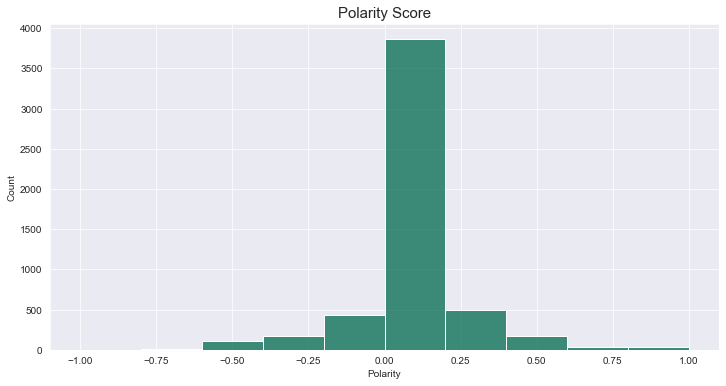

In [30]:
sns.histplot(data=df, x='Polarity', bins=10, color='#006A4E')
plt.title('Polarity Score', size=15)

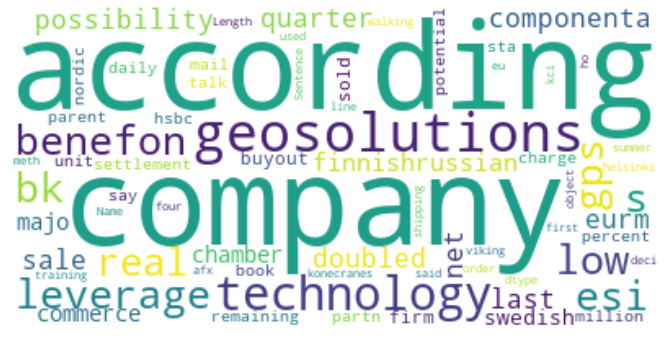

In [31]:
wc = WordCloud(stopwords=STOPWORDS,
    background_color='white', mode='RGB').generate(str(df["Sentence"]))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [32]:
def wordcl(data, title):
    wc = WordCloud(background_color='white', stopwords=STOPWORDS).generate(data)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(title)

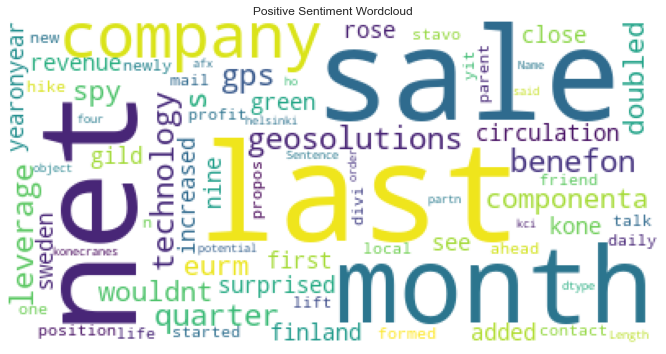

In [33]:
wordcl(str(positive['Sentence']), 'Positive Sentiment Wordcloud')

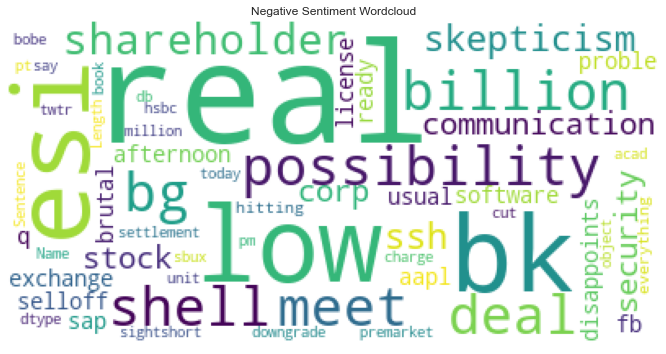

In [34]:
wordcl(str(negative['Sentence']), 'Negative Sentiment Wordcloud')

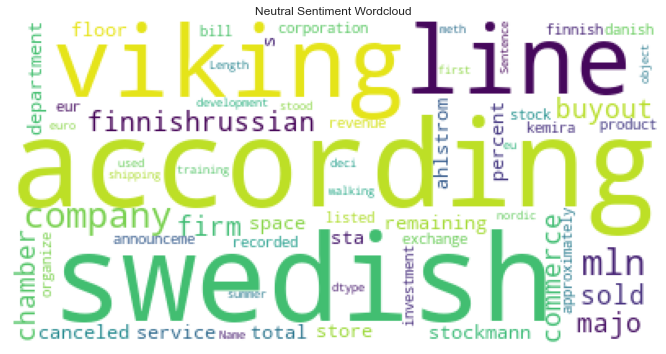

In [35]:
wordcl(str(neutral['Sentence']), 'Neutral Sentiment Wordcloud')

# Frequency of Words

In [57]:
freq_whole = pd.Series(' '.join(df['Sentence']).split()).value_counts()[0:200] #top 200 words

In [58]:
freq_positive = pd.Series(' '.join(positive['Sentence']).split()).value_counts()[0:200] #top 200 words

In [59]:
freq_negative = pd.Series(' '.join(negative['Sentence']).split()).value_counts()[0:200] #top 200 words

In [60]:
freq_neutral = pd.Series(' '.join(neutral['Sentence']).split()).value_counts()[0:200] #top 200 words

In [61]:
freq_whole.to_csv('whole.csv')
freq_positive.to_csv('positive.csv')
freq_negative.to_csv('negative.csv')
freq_neutral.to_csv('neutral.csv')

In [62]:
# Read the first Excel file into a DataFrame
df1 = pd.read_csv('positive.csv')

# Read the second Excel file into a DataFrame
df2 = pd.read_csv('negative.csv')

# Read the second Excel file into a DataFrame
df3 = pd.read_csv('neutral.csv')

# Concatenate the two DataFrames column-wise
result = pd.concat([df1, df2, df3], axis=1)

# Write the result to a new Excel file
result.to_excel('output.xlsx', index=False)

In [63]:
# Load the Excel file into a DataFrame
data = pd.read_excel('output.xlsx')

# Get a list of column names
column_names = list(data.columns)

# Add a prefix to duplicate column names
unique_column_names = []
for name in column_names:
    if name in unique_column_names:
        unique_column_names.append(name + '_new')
    else:
        unique_column_names.append(name)
data.columns = unique_column_names

# Save the modified DataFrame to a new Excel file
data.to_excel('modified.xlsx', index=False)

# Common Words

In [64]:
# Read the Excel file into a DataFrame
data = pd.read_excel('modified.xlsx')

# Find common words between two columns
common_words = set(data['Unnamed: 0']).intersection(set(data['Unnamed: 0.1']), set(data['Unnamed: 0.2']))

# Print the common words
print(common_words)

{'share', 'last', 'manufacturer', 'oyj', 'end', 'one', 'omx', 'year', 'sell', 'said', 'stock', 'first', 'per', 'oil', 'compared', 'however', 'group', 'month', 'unit', 'company', 'also', 'helsinki', 'finland', 'finnish', 'investment', 'hel', 'market', 'profit', 'operation', 'management', 'euro', 'product', 'loss', 'earlier', 'price', 'may', 'today', 'third', 'pct', 'mln', 'million', 'percent', 'result', 'period', 'usd', 'mn', 'operating', 'net', 'billion', 'bank', 'time', 'eurm', 'u', 'capital', 'second', 'news', 'revenue', 'quarter', 'eur', 'production', 'system', 'sale', 'total', 'would', 'plan', 'dividend', 'report', 'contract', 'corresponding', 'ceo', 'new'}


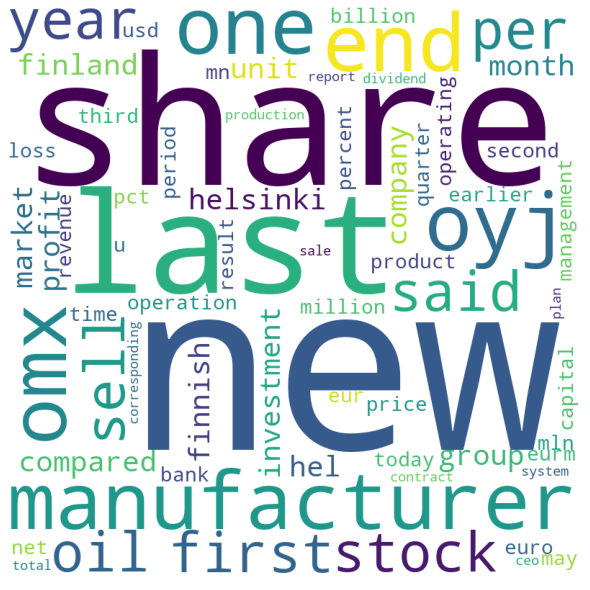

In [68]:
# common_words 
# Create a string of the common words
common_text = ' '.join(common_words)

# Create a word cloud of the unique words
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(common_text)

# Display the word cloud
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Unique Words

In [69]:
# Read the Excel file into a DataFrame
data = pd.read_excel('modified.xlsx')

# Find the unique words in each column
col1_words = set(data['Unnamed: 0'])
col2_words = set(data['Unnamed: 0.1'])
col3_words = set(data['Unnamed: 0.2'])

In [70]:
# Find the unique words in the first two columns
diff = col1_words - col2_words - col3_words
print(diff)

{'long', 'beer', 'buy', 'respectively', 'current', 'supply', 'bullish', 'estimated', 'steel', 'grew', 'uk', 'provider', 'drug', 'saving', 'improved', 'income', 'aim', 'volume', 'received', 'versus', 'ago', 'cash', 'signed', 'ab', 'increase', 'handling', 'run', 'significant', 'target', 'insurance', 'february', 'positive', 'increased', 'largest', 'higher', 'yearonyear', 'expects', 'breakout', 'astrazeneca', 'position', 'improve', 'strong', 'call', 'rose', 'rise', 'strategy', 'looking', 'awarded', 'growth', 'eps', 'narrowed', 'metal', 'demand', 'ruukki', 'head', 'cooperation', 'yit'}


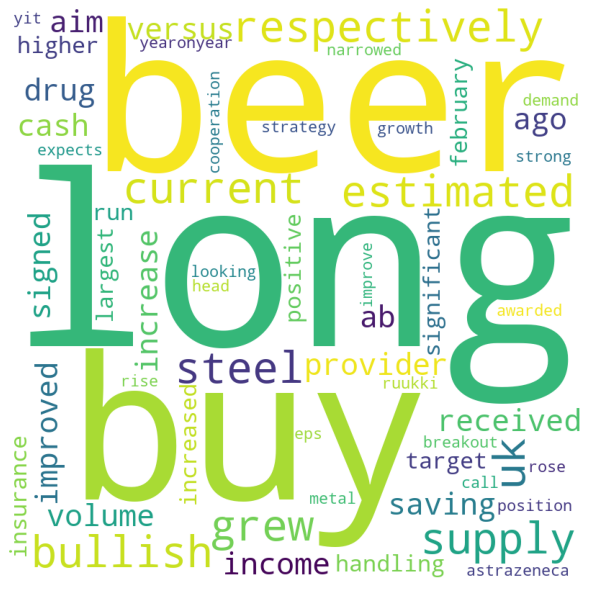

In [71]:
# Create a string of the unique_words
unique_text = ' '.join(diff)

# Create a word cloud of the unique words
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(unique_text)

# Display the word cloud
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# N-Grams

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

# Uni-Grams

In [72]:
def get_top_n1_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(1,1), max_features=2000).fit(corpus)  #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [75]:
top_words = get_top_n1_words(df["Sentence"], n=200) #top 200
top_df = pd.DataFrame(top_words)
top_df.columns=["Uni-gram", "Freq"]
top_df.head()

,Uni-gram,Freq
0,eur,1251
1,company,830
2,mn,582
3,sale,515
4,share,468


In [76]:
top_df["Polarity"] = top_df["Uni-gram"].map(lambda txt: TextBlob(txt).sentiment.polarity)

In [77]:
top_df

,Uni-gram,Freq,Polarity
0,eur,1251,0.0
1,company,830,0.0
2,mn,582,0.0
3,sale,515,0.0
4,share,468,0.0
...,...,...,...
195,store,44,0.0
196,february,44,0.0
197,level,44,0.0
198,uk,44,0.0


In [78]:
def getanalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [79]:
top_df['Sentiment']= top_df['Polarity'].apply(getanalysis)

In [80]:
top_df['Label']= top_df['Sentiment'].map({'Negative':0,  'Neutral':1, 'Positive':2})

In [81]:
top_df.head()

,Uni-gram,Freq,Polarity,Sentiment,Label
0,eur,1251,0.0,Neutral,1
1,company,830,0.0,Neutral,1
2,mn,582,0.0,Neutral,1
3,sale,515,0.0,Neutral,1
4,share,468,0.0,Neutral,1


In [82]:
top_df.head()

,Uni-gram,Freq,Polarity,Sentiment,Label
0,eur,1251,0.0,Neutral,1
1,company,830,0.0,Neutral,1
2,mn,582,0.0,Neutral,1
3,sale,515,0.0,Neutral,1
4,share,468,0.0,Neutral,1


# Bi-Grams

In [85]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus)  #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [86]:
top2_words = get_top_n2_words(df["Sentence"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,eur mn,547
1,net sale,232
2,eur million,204
3,operating profit,188
4,mn eur,141


In [87]:
top2_df["Polarity"] = top2_df["Bi-gram"].map(lambda txt: TextBlob(txt).sentiment.polarity)

In [88]:
top2_df['Sentiment']= top2_df['Polarity'].apply(getanalysis)

In [89]:
top2_df['Label']= top2_df['Sentiment'].map({'Negative':0,  'Neutral':1, 'Positive':2})

In [90]:
top2_df.head()

,Bi-gram,Freq,Polarity,Sentiment,Label
0,eur mn,547,0.0,Neutral,1
1,net sale,232,0.0,Neutral,1
2,eur million,204,0.0,Neutral,1
3,operating profit,188,0.0,Neutral,1
4,mn eur,141,0.0,Neutral,1


- Bi-Gram Analysis
    - There is a common word like profit which was found in Bi-Gram with the words operating profit, net profit
    - common word eur with eur mn, eue eur, eur million and few more words which are related to the finance domian and they does not contibute much to the Sentiments

# Tri-Gram

In [91]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)  #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [92]:
top3_words = get_top_n3_words(df["Sentence"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df

,Tri-gram,Freq
0,mn eur mn,139
1,eur mn eur,137
2,mln euro mln,99
3,eur mn corresponding,59
4,mn corresponding period,59
...,...,...
195,company net sale,6
196,increase share capital,6
197,approximately eur million,6
198,net profit third,6


In [93]:
top3_df["Polarity"] = top3_df["Tri-gram"].map(lambda txt: TextBlob(txt).sentiment.polarity)

In [94]:
top3_df['Sentiment']= top3_df['Polarity'].apply(getanalysis)

In [95]:
top3_df['Label']= top3_df['Sentiment'].map({'Negative':0,  'Neutral':1, 'Positive':2})

In [96]:
top3_df.head()

,Tri-gram,Freq,Polarity,Sentiment,Label
0,mn eur mn,139,0.0,Neutral,1
1,eur mn eur,137,0.0,Neutral,1
2,mln euro mln,99,0.0,Neutral,1
3,eur mn corresponding,59,0.0,Neutral,1
4,mn corresponding period,59,0.0,Neutral,1


- Tri-Gram
    - We found same analysis as bi-gram so we decided to drop common words

In [97]:
top_df.to_csv('uni.csv')
top2_df.to_csv('bi.csv')
top3_df.to_csv('tri.csv')

# Dropping common words

In [98]:
Stopwords = (set(nltk.corpus.stopwords.words("english")))

In [99]:
Stopwords.remove('not')
Stopwords.remove('down')
Stopwords.remove('more')
Stopwords.remove('under')

In [100]:
domain_words=['system', 'finland', 'today', 'time', 'third', 'news', 'helsinki', 'usd', 'total', 'million', 'bank',
              'report', 'omx', 'mln', 'compared', 'u', 'eur', 'capital', 'eurm', 'first', 'however', 'finnish', 'end', 
              'group', 'profit', 'plan', 'dividend', 'corresponding', 'quarter', 'stock', 'also', 'share', 'management',
              'said', 'last', 'contract', 'operation', 'month', 'oyj', 'billion', 'net', 'second', 'sale', 'new', 
              'operating', 'hel', 'production', 'revenue', 'price', 'would', 'earlier', 'unit', 'loss', 'ceo', 'per',
              'percent', 'product', 'may', 'pct', 'manufacturer', 'one', 'result', 'euro', 'sell', 'oil', 'investment', 
              'mn', 'year', 'period', 'market', 'company', 'oyj']

In [101]:
Stopwords.update(domain_words)

In [102]:
def clean_data(text):
    #txt = re.sub('[^a-z]', ' ',text)
    #txt = txt.lower()
    txt = text.split()
    lemma= WordNetLemmatizer()
    txt = [lemma.lemmatize(i) for i in txt if not i in Stopwords]
    return(" ".join(txt))
    

In [103]:
df['Sentence'] = df['Sentence'].apply(clean_data)

In [104]:
df.head()

,Sentence,Sentiment,length,num_words,label,Polarity_vader,Polarity
0,geosolutions technology leverage benefon gps s...,positive,182,21,2,"{'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'comp...",0.209091
1,esi low bk real possibility,negative,27,5,0,"{'neg': 0.344, 'neu': 0.656, 'pos': 0.0, 'comp...",0.100000
2,componenta doubled moved zero pretax pretax,positive,112,18,2,"{'neg': 0.108, 'neu': 0.755, 'pos': 0.137, 'co...",0.000000
3,according finnishrussian chamber commerce majo...,neutral,93,10,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.062500
4,swedish buyout firm sold remaining stake almos...,neutral,100,14,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",-0.100000


In [105]:
def predict(model):
    model = model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    trainac = model.score(xtrain, ytrain)
    testac = model.score(xtest, ytest)
    
    print(f"Train accuracy {trainac}\nTest accuracy {testac}")
    
    print(classification_report(ytest, ypred))
    

In [106]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

#  Model Building after dropping Common Words

# Uni-Grams

In [107]:
def get_top_n1_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(1,1), max_features=2000).fit(corpus)  #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [108]:
top_words = get_top_n1_words(df["Sentence"], n=200) #top 200
top_df = pd.DataFrame(top_words)
top_df.columns=["Uni-gram", "Freq"]
top_df.head()
     

,Uni-gram,Freq
0,service,285
1,business,260
2,solution,145
3,plant,130
4,order,129


In [109]:
top_df["Polarity"] = top_df["Uni-gram"].map(lambda txt: TextBlob(txt).sentiment.polarity)

In [110]:
def getanalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [111]:
top_df['Sentiment']= top_df['Polarity'].apply(getanalysis)

In [112]:
top_df['Label']= top_df['Sentiment'].map({'Negative':0,  'Neutral':1, 'Positive':2})

In [113]:
top_df.head()

,Uni-gram,Freq,Polarity,Sentiment,Label
0,service,285,0.0,Neutral,1
1,business,260,0.0,Neutral,1
2,solution,145,0.0,Neutral,1
3,plant,130,0.0,Neutral,1
4,order,129,0.0,Neutral,1


# Bi-Grams

In [114]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus)  #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [115]:
top2_words = get_top_n2_words(df["Sentence"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()
     

,Bi-gram,Freq
0,board director,36
1,stora enso,29
2,alma medium,28
3,st petersburg,28
4,earnings eps,27


In [116]:
top2_df["Polarity"] = top2_df["Bi-gram"].map(lambda txt: TextBlob(txt).sentiment.polarity)

In [117]:
top2_df['Sentiment']= top2_df['Polarity'].apply(getanalysis)

In [118]:
top2_df['Label']= top2_df['Sentiment'].map({'Negative':0,  'Neutral':1, 'Positive':2})

In [119]:
top2_df.head()

,Bi-gram,Freq,Polarity,Sentiment,Label
0,board director,36,0.0,Neutral,1
1,stora enso,29,0.0,Neutral,1
2,alma medium,28,0.0,Neutral,1
3,st petersburg,28,0.0,Neutral,1
4,earnings eps,27,0.0,Neutral,1


# Tri-Gram

In [120]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)  #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [121]:
top3_words = get_top_n3_words(df["Sentence"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df

,Tri-gram,Freq
0,annual general meeting,15
1,nokia siemens network,14
2,excluding nonrecurring item,14
3,earnings eps amounted,10
4,fair value property,9
...,...,...
195,alexandria va march,3
196,cash flow totalled,3
197,thus balance sheet,3
198,balance sheet goodwill,3


In [122]:
top3_df["Polarity"] = top3_df["Tri-gram"].map(lambda txt: TextBlob(txt).sentiment.polarity)

In [123]:
top3_df['Sentiment']= top3_df['Polarity'].apply(getanalysis)

In [124]:
top3_df['Label']= top3_df['Sentiment'].map({'Negative':0,  'Neutral':1, 'Positive':2})

In [125]:
top3_df.head()

,Tri-gram,Freq,Polarity,Sentiment,Label
0,annual general meeting,15,0.05,Positive,2
1,nokia siemens network,14,0.00,Neutral,1
2,excluding nonrecurring item,14,0.00,Neutral,1
3,earnings eps amounted,10,0.00,Neutral,1
4,fair value property,9,0.70,Positive,2


# Model Building

In [127]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [128]:
def predict(model):
    model = model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    trainac = model.score(xtrain, ytrain)
    testac = model.score(xtest, ytest)
    
    print(f"Train accuracy {trainac}\nTest accuracy {testac}")
    
    print(classification_report(ytest, ypred))

In [129]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Tf-idf vectorizer

## UniGram

In [130]:
tf =  TfidfVectorizer(ngram_range=(1,1))
x = tf.fit_transform(top_df['Uni-gram'])

X = pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())
X

,aapl,ab,according,acquisition,added,agreement,aim,amount,amounted,analyst,...,tsla,two,uk,use,value,volume,week,well,work,world
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
y = top_df['Label']

In [133]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=1)

In [134]:
predict(AdaBoostClassifier())

Train accuracy 0.9625
Test accuracy 0.825
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.82      1.00      0.90        33
           2       0.00      0.00      0.00         4

    accuracy                           0.82        40
   macro avg       0.27      0.33      0.30        40
weighted avg       0.68      0.82      0.75        40



## Bigram

In [135]:
tf =  TfidfVectorizer(ngram_range=(2,2))
x = tf.fit_transform(top2_df['Bi-gram'])

X = pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())
X


,ab inbev,actual situation,adp feb,adp nov,ahlstrom corporation,aker yard,aldata solution,alexandria va,alma medium,amer sport,...,tsla recall,united state,value deal,value order,value property,vice president,viking line,voting right,water treatment,world largest
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
y = top2_df['Label']

In [137]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=1)

In [138]:
predict(AdaBoostClassifier())

Train accuracy 0.925
Test accuracy 0.825
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.82      1.00      0.90        33
           2       0.00      0.00      0.00         4

    accuracy                           0.82        40
   macro avg       0.27      0.33      0.30        40
weighted avg       0.68      0.82      0.75        40



## TriGram

In [140]:
tf =  TfidfVectorizer(ngram_range=(3,3))
x = tf.fit_transform(top3_df['Tri-gram'])

X = pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())
X

,abc option based,actual situation future,alexandria va march,alexandria va oct,alma medium corporation,analysis give clear,annual general meeting,arm holding plc,aspo plc exchange,balance sheet goodwill,...,two commercial nordea,united state patent,using fund provide,vice chairman board,vice president corporate,vmc corporation rapala,wafer technology okmetic,well fargo stake,wipe nonwovens flexible,world largest stainless
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
y = top3_df['Label']

In [143]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=1)

In [144]:
predict(AdaBoostClassifier())

Train accuracy 0.875
Test accuracy 0.875
              precision    recall  f1-score   support

           1       0.88      1.00      0.93        35
           2       0.00      0.00      0.00         5

    accuracy                           0.88        40
   macro avg       0.44      0.50      0.47        40
weighted avg       0.77      0.88      0.82        40



In [146]:
dataset_df= pd.concat([top_df.rename(columns={'Uni-gram': 'gram'}), top2_df.rename(columns={'Bi-gram': 'gram'}), top3_df.rename(columns={'Tri-gram': 'gram'})], ignore_index=True)

In [147]:
dataset_df

,gram,Freq,Polarity,Sentiment,Label
0,service,285,0.0,Neutral,1
1,business,260,0.0,Neutral,1
2,solution,145,0.0,Neutral,1
3,plant,130,0.0,Neutral,1
4,order,129,0.0,Neutral,1
...,...,...,...,...,...
595,alexandria va march,3,0.0,Neutral,1
596,cash flow totalled,3,0.0,Neutral,1
597,thus balance sheet,3,0.0,Neutral,1
598,balance sheet goodwill,3,0.0,Neutral,1


# Finalized Model Building

In [148]:
tf =  TfidfVectorizer()
x = tf.fit_transform(dataset_df['gram'])

X = pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())
X


,aapl,ab,abc,abp,according,acquisition,activity,actual,added,adp,...,wafer,water,week,well,wipe,work,world,worth,yard,yit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
y= dataset_df['Label']

In [150]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=1)

In [151]:
predict(AdaBoostClassifier())

Train accuracy 0.9354166666666667
Test accuracy 0.8916666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.89      1.00      0.94       106
           2       0.00      0.00      0.00        13

    accuracy                           0.89       120
   macro avg       0.63      0.67      0.65       120
weighted avg       0.80      0.89      0.84       120



In [152]:
predict(GradientBoostingClassifier(random_state=1))

Train accuracy 1.0
Test accuracy 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.96      1.00      0.98       106
           2       1.00      0.69      0.82        13

    accuracy                           0.97       120
   macro avg       0.99      0.90      0.93       120
weighted avg       0.97      0.97      0.96       120



## Hyperparamter Tuning

In [153]:
from sklearn.model_selection import GridSearchCV

In [154]:
paramas = {
    'loss': ['log_loss', 'deviance'],
    'n_estimators': [100, 120,140,200,250,300,350],
    'max_depth': [3,4,5]
    
}

In [155]:
grid= GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid=paramas)

In [156]:
grid.fit(xtrain, ytrain)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'loss': ['log_loss', 'deviance'],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 120, 140, 200, 250, 300, 350]})

In [159]:
grid.best_estimator_

GradientBoostingClassifier(n_estimators=200, random_state=1)

In [160]:
grid.best_score_

0.9708333333333334

# Model Building

In [161]:
#text Vectorization
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [162]:
X_train = cv.fit_transform(dataset_df['gram']).toarray()
X_test = cv.transform(dataset_df['gram']).toarray()

In [163]:
X_train.shape

(600, 518)

In [164]:
y_train=dataset_df['Label'].values

In [165]:
y_train.shape

(600,)

In [166]:
X_test.shape

(600, 518)

In [168]:
y_test=dataset_df['Label'].values

In [169]:
y_test.shape

(600,)

In [170]:
predict(GradientBoostingClassifier(n_estimators=200, random_state=1))

Train accuracy 1.0
Test accuracy 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.96      1.00      0.98       106
           2       1.00      0.69      0.82        13

    accuracy                           0.97       120
   macro avg       0.99      0.90      0.93       120
weighted avg       0.97      0.97      0.96       120



In [171]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [172]:
gb = GradientBoostingClassifier(n_estimators=200, random_state=1)
gb.fit(X_train, y_train)
y_pred2 = gb.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred2))
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred2))
print('Recall Score',recall_score(y_test,y_pred2, average='micro'))
print('Precesion Score',precision_score(y_test, y_pred2, average='micro')) 
print('F1 Score',f1_score(y_test,y_pred2, average='micro'))
pred_prob2 = gb.predict_proba(X_test)
#print('Roc Score',roc_auc_score(ytest, pred_prob2, multi_class='ovr'))

Accuracy 1.0
Confusion Matrix
 [[ 18   0   0]
 [  0 531   0]
 [  0   0  51]]
Recall Score 1.0
Precesion Score 1.0
F1 Score 1.0


In [173]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred2))
print('\n')
print("=== Classification Report Testing ===")
print(classification_report(y_test, y_pred2))
print('\n')

=== Confusion Matrix ===
[[ 18   0   0]
 [  0 531   0]
 [  0   0  51]]


=== Classification Report Testing ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00       531
           2       1.00      1.00      1.00        51

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600





In [174]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_train, y_pred2))
print('\n')
print("=== Classification Report Training ===")
print(classification_report(y_train, y_pred2))
print('\n')

=== Confusion Matrix ===
[[ 18   0   0]
 [  0 531   0]
 [  0   0  51]]


=== Classification Report Training ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00       531
           2       1.00      1.00      1.00        51

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600





# Pipeline

In [175]:
from sklearn.pipeline import Pipeline

In [177]:
# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(dataset_df['gram'], dataset_df['Sentiment'], test_size=0.2)

In [178]:
# Define pipeline
model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', GradientBoostingClassifier(n_estimators=200, random_state=1))
])

In [179]:
model.fit(xtrain, ytrain)       # Train model using pipeline
y_pred = model.predict(xtest)   # Evaluate model on testing set
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         1
     Neutral       0.97      1.00      0.99       112
    Positive       1.00      0.57      0.73         7

    accuracy                           0.97       120
   macro avg       0.99      0.86      0.90       120
weighted avg       0.98      0.97      0.97       120



# Model Saving

In [182]:
import pickle
pickle.dump(model, open('token.pkl', 'wb'))